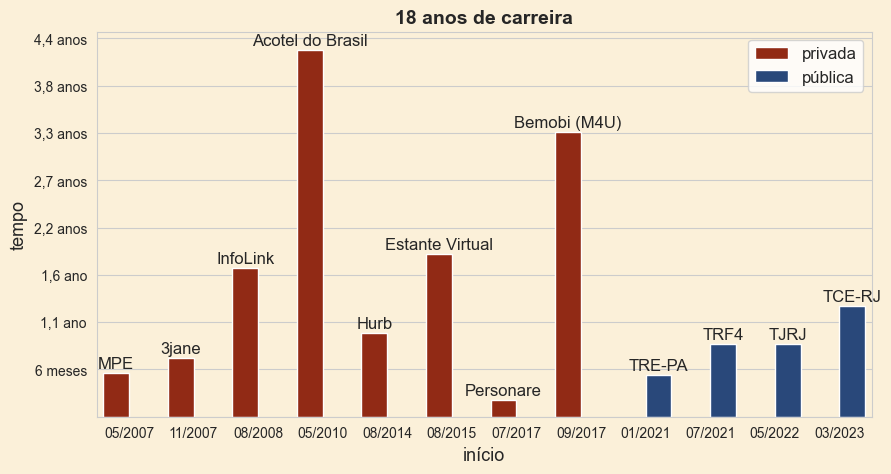

In [1]:
from datetime import datetime
import math

import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns


def format_date(date: str) -> datetime:
    return datetime.strptime(date, '%d/%m/%Y') if date != 'nan' else datetime.now()


def format_y_axis(y_param: int, _pos: int) -> str:
    y_axis = ''
    anos = y_param / 365

    if anos >= 1:
        ano_str = 'anos' if anos >= 2 else 'ano'
        y_axis = f'{anos:.1f} {ano_str}'.replace('.', ',')
    elif y_param > 0:
        meses = int(np.mod(y_param, 365) / 30)
        y_axis = f'{meses} meses'

    return y_axis


def main() -> None:
    sns.set_style('whitegrid')
    %matplotlib inline

    carreira = pd.read_csv('carreira.csv', delimiter=';')
    carreira['entrada'] = carreira['entrada'].apply(format_date)
    carreira['saida'] = carreira['saida'].apply(format_date)
    carreira['dias'] = (carreira['saida'] - carreira['entrada']).dt.days + 1
    carreira['inicio'] = carreira['entrada'].dt.strftime('%m/%Y')

    first_entry = carreira['entrada'].min()
    last_exit = carreira['saida'].max()
    total_years = math.ceil((last_exit - first_entry).days / 365)

    bgcolor = '#fbf0d9'

    fig, ax = plt.subplots(figsize=(10, 5))
    fig.set_facecolor(bgcolor)
    ax.set_facecolor(bgcolor)

    formatter = ticker.FuncFormatter(format_y_axis)
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    sns.barplot(data=carreira, x='inicio', y='dias', hue='esfera', palette=sns.color_palette(['#a61c00', '#1c4587']),
                ax=ax)

    plt.title(f'{total_years} anos de carreira', fontsize=14, weight='bold')
    plt.xlabel('início', fontsize=13)
    plt.ylabel('tempo', fontsize=13)
    plt.legend(fontsize=12)

    for container in ax.containers:
        for rect in container:
            height = rect.get_height()
            x_pos = rect.get_x() + rect.get_width() / 2
            y_pos = height + 20
            text = carreira.iloc[container.index(rect)]['instituicao']
            ax.annotate(text, xy=(x_pos, y_pos), ha='center', fontsize=12)

    plt.show()


if __name__ == '__main__':
    main()